In [13]:
import pandas as pd
import re

In [14]:
# Load the dataset
df = pd.read_csv('Dataset/crime_severity_bjs.csv')

In [15]:
print(f"Shape: {df.shape}\n")

Shape: (204, 3)



In [16]:
df.head()

,Crime,Description,BJS_Severity_Score
0,ARSON,A person plants a bomb in a public building. T...,72.1
1,CRIMINAL SEXUAL ASSAULT,A man forcibly rapes a woman. As a result of p...,52.8
2,OFFENSE INVOLVING CHILDREN,A parent beats his young child with his fists....,47.8
3,ARSON,A person plants a bomb in a public building. T...,43.9
4,HOMICIDE,A person robs a victim at gunpoint. The victim...,43.2


Basic EDA

In [17]:
# Basic structure of the dataset
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of dataset: (204, 3)

Data Types:
 Crime                  object
Description            object
BJS_Severity_Score    float64
dtype: object


In [18]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Crime                 0
Description           0
BJS_Severity_Score    0
dtype: int64


In [19]:
# Unique counts
print("\nUnique Crimes:", df['Crime'].nunique())
print("Unique Descriptions:", df['Description'].nunique())
print("")


Unique Crimes: 24
Unique Descriptions: 204



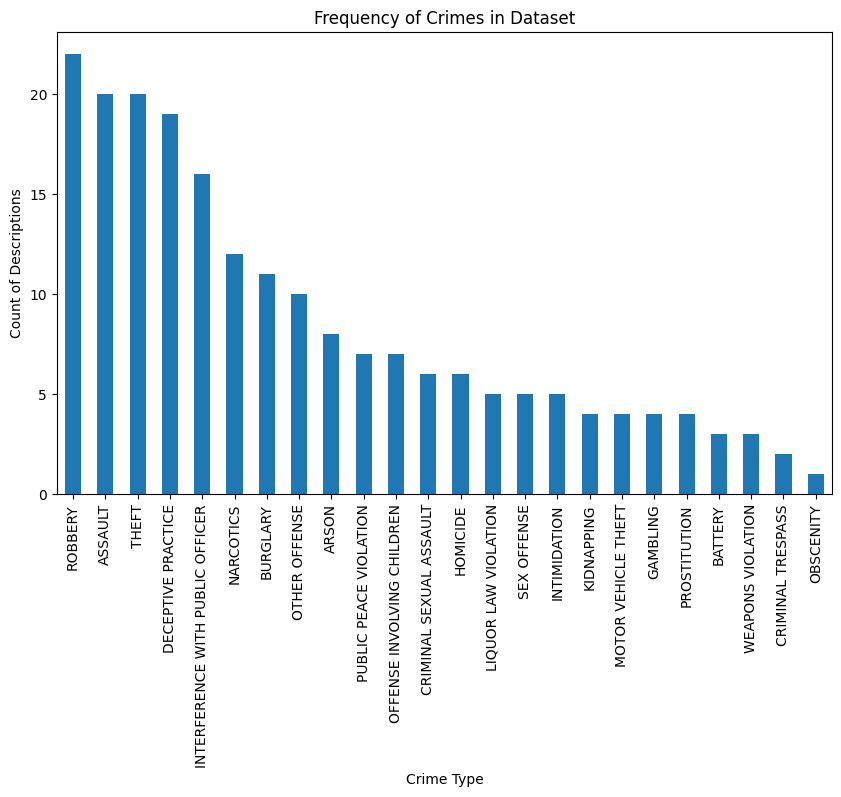

Crime
ROBBERY                             22
ASSAULT                             20
THEFT                               20
DECEPTIVE PRACTICE                  19
INTERFERENCE WITH PUBLIC OFFICER    16
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

# Count of each crime type
crime_counts = df['Crime'].value_counts()

plt.figure(figsize=(10,6))
crime_counts.plot(kind='bar')
plt.title("Frequency of Crimes in Dataset")
plt.xlabel("Crime Type")
plt.ylabel("Count of Descriptions")
plt.xticks(rotation=90)
plt.show()

crime_counts.head()


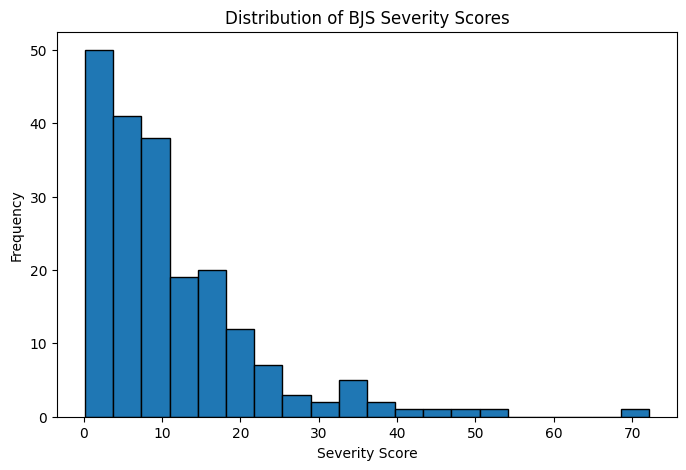

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df['BJS_Severity_Score'], bins=20, edgecolor='black')
plt.title("Distribution of BJS Severity Scores")
plt.xlabel("Severity Score")
plt.ylabel("Frequency")
plt.show()


<Figure size 1200x600 with 0 Axes>

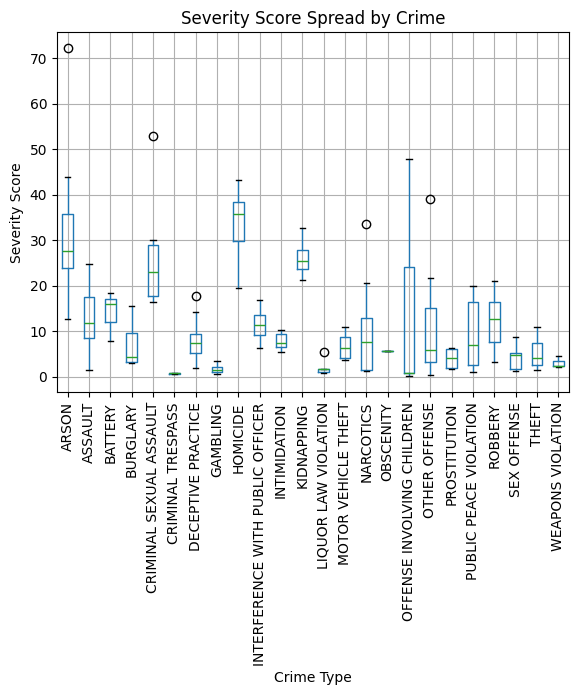

In [25]:
# Boxplot for spread of severity scores by crime
plt.figure(figsize=(12,6))
df.boxplot(column='BJS_Severity_Score', by='Crime', rot=90)
plt.title("Severity Score Spread by Crime")
plt.suptitle("")  # removes the default pandas title
plt.xlabel("Crime Type")
plt.ylabel("Severity Score")
plt.show()

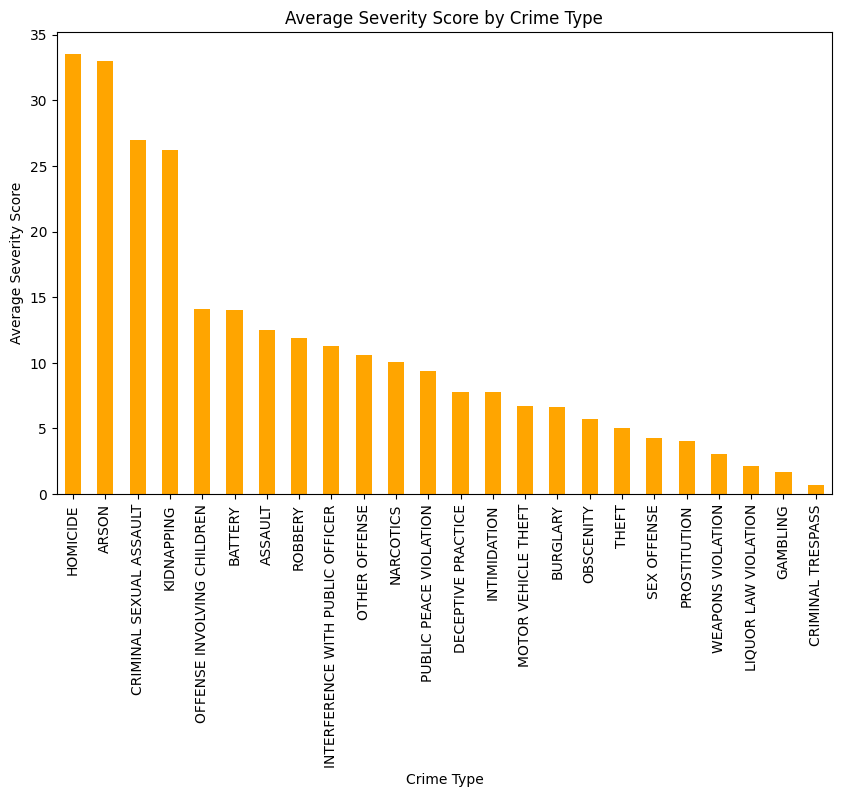

Crime
HOMICIDE                      33.516667
ARSON                         32.987500
CRIMINAL SEXUAL ASSAULT       27.000000
KIDNAPPING                    26.175000
OFFENSE INVOLVING CHILDREN    14.071429
Name: BJS_Severity_Score, dtype: float64

In [23]:
# Mean severity per crime
mean_severity = df.groupby('Crime')['BJS_Severity_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
mean_severity.plot(kind='bar', color='orange')
plt.title("Average Severity Score by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Average Severity Score")
plt.xticks(rotation=90)
plt.show()

mean_severity.head()


In [24]:
# Descriptive stats for severity
print(df['BJS_Severity_Score'].describe())

# Crimes with highest and lowest severity scores
highest = df.loc[df['BJS_Severity_Score'].idxmax()]
lowest = df.loc[df['BJS_Severity_Score'].idxmin()]

print("\nHighest Severity:\n", highest)
print("\nLowest Severity:\n", lowest)

count    204.000000
mean      11.348039
std       10.661382
min        0.200000
25%        4.100000
50%        8.250000
75%       15.750000
max       72.100000
Name: BJS_Severity_Score, dtype: float64

Highest Severity:
 Crime                                                             ARSON
Description           A person plants a bomb in a public building. T...
BJS_Severity_Score                                                 72.1
Name: 0, dtype: object

Lowest Severity:
 Crime                                        OFFENSE INVOLVING CHILDREN
Description           A person under 16 years old plays hooky from s...
BJS_Severity_Score                                                  0.2
Name: 203, dtype: object


### BASIC CLEANING

In [26]:
# 1. Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Duplicate rows: 0


In [27]:
# 2. Normalize column values (Crime to uppercase, strip spaces)
df['Crime'] = df['Crime'].str.upper().str.strip()

In [ ]:
# 3. Clean Description text (remove extra spaces, normalize case)
df['Description_Clean'] = (
    df['Description']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

In [29]:
# 4. Outlier detection (IQR method for severity score)
Q1 = df['BJS_Severity_Score'].quantile(0.25)
Q3 = df['BJS_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['BJS_Severity_Score'] < (Q1 - 1.5 * IQR)) |
              (df['BJS_Severity_Score'] > (Q3 + 1.5 * IQR))]

print("Number of potential outliers in Severity Score:", len(outliers))

Number of potential outliers in Severity Score: 10
